In [6]:
# Download data from CloudStor
# download function provided by https://stackoverflow.com/questions
# /16694907/how-to-download-large-file-in-python-with-requests-py

import requests
url = 'https://cloudstor.aarnet.edu.au/plus/index.php/s/EQax6CINicFMDrm/download'
file_name = 'data00mm.zip'

def download_file(url, file_name):
    local_filename = file_name
    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                #f.flush() commented by recommendation from J.F.Sebastian
    return local_filename

download_file(url, file_name)

https://cloudstor.aarnet.edu.au/plus/index.php/s/EQax6CINicFMDrm/download


In [7]:
# Unzip data
import zipfile
import OS

with zipfile.ZipFile(file_name,"r") as zip_ref:
    zip_ref.extractall(".")
    
print('completed')
os.listdir()

completed


In [16]:
import os
import nibabel as nib
import numpy as np

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

# list the directory to confirm unzipped folder name (should be 'data')
# os.listdir()
datapath = 'data/'
filelist = os.listdir('data')
example_nii = os.path.join(datapath, filelist[-1]) # mwc1PIT044.nii
nii_img = nib.load(example_nii)
print(nii_img.shape)

(121, 145, 121)


In [42]:
nib.is_proxy(nii_img.dataobj)
image_data = np.array(nii_img.get_data())
print(type(image_data))
print(image_data.shape)
print(' ')
A = image_data[:,:,60] # Axial slice 60
C = image_data[:,80,:] # Coronal slice 90
S = image_data[60,:,:] # Sagittal slice 60
print(A.shape)
print(C.shape)
print(S.shape)

<class 'numpy.ndarray'>
(121, 145, 121)
 
(121, 145)
(121, 121)
(145, 121)


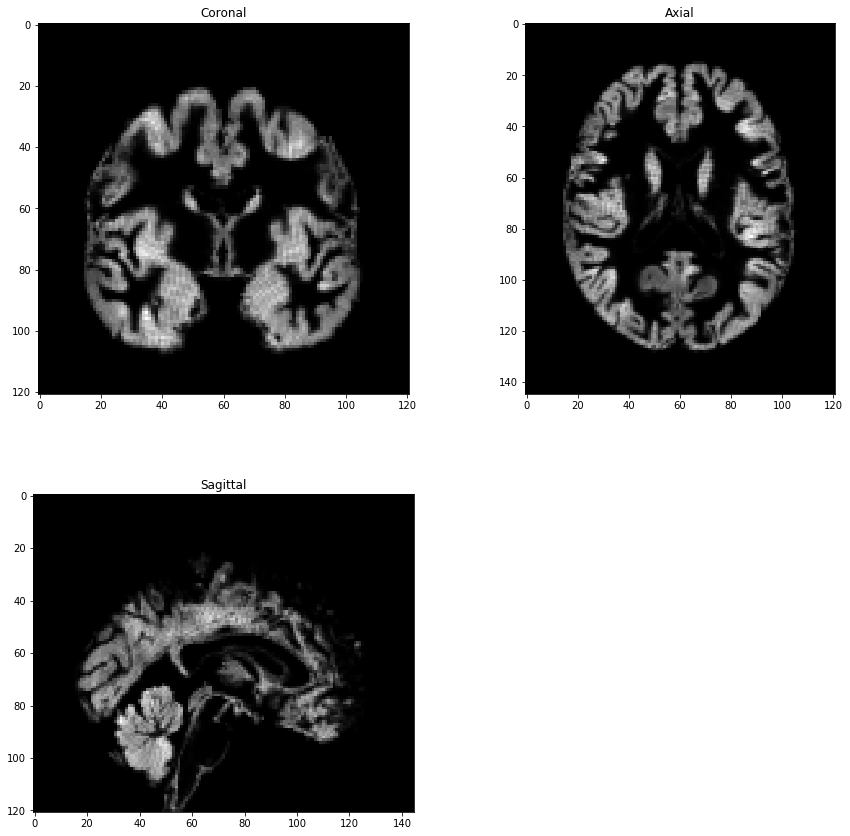

In [52]:
import matplotlib.pyplot as pl
%matplotlib inline

pl.figure(figsize = (15,15))
pl.subplot(223)
pl.imshow(np.rot90(S), cmap=pl.cm.gray)
pl.title('Sagittal')

pl.subplot(222)
pl.imshow(np.rot90(A), cmap=pl.cm.gray)
pl.title('Axial')


pl.subplot(221)
pl.imshow(np.rot90(C), cmap=pl.cm.gray)
pl.title('Coronal')
pl.show()